<a href="https://colab.research.google.com/github/ManasCode-sketch/Big-Basket/blob/main/Big_Basket1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
df = pd.read_csv("/content/BigBasket Products.csv")

# **Data exploring**

In [2]:
# Getting the preview of dataset column like dataType and no. of rows and columns and can also count null values.
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27555 entries, 0 to 27554
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   index         27555 non-null  int64  
 1   product       27554 non-null  object 
 2   category      27555 non-null  object 
 3   sub_category  27555 non-null  object 
 4   brand         27554 non-null  object 
 5   sale_price    27549 non-null  float64
 6   market_price  27555 non-null  float64
 7   type          27555 non-null  object 
 8   rating        18919 non-null  float64
 9   description   27440 non-null  object 
dtypes: float64(3), int64(1), object(6)
memory usage: 2.1+ MB




> **So from the above preview the insights we get**-



1. The ***product*** and ***brand*** are having very few null values which we can just remove.
2. The ***sale_price*** is having a 0.02% null values from the whole column which we can remove as it is less than 0.3% (Reason of saying this is beacuse there's a rule that if there are null values in the column and it is less than 0.3% of that column than we can remove it.)

 * The main reason for removing them instead of filling them is beacause we   don't have a real data for this data set so filling them by any way (Like- mean, meadian, mode or any other way) will make it minor wrong indicated so we choose not to fill it.


3. The ***rating*** column is having 31.34% of null values (which we are going to handle)
4. And at last the ***description*** column is having 0.41% of null values (which we will handle too.)











In [3]:
# Percentage of null values being present within the columns
df.isnull().sum()/df.shape[0]*100

,0
index,0.000000
product,0.003629
category,0.000000
sub_category,0.000000
brand,0.003629
sale_price,0.021775
market_price,0.000000
type,0.000000
rating,31.340954
description,0.417347




> **Now looking at the describe of the Data**

- Checking the data is normally distibuted or not.
- If we found outliers, then creating box plot for the better representation of outliers.







In [4]:
df.describe()

,index,sale_price,market_price,rating
count,27555.00000,27549.000000,27555.000000,18919.000000
mean,13778.00000,334.648391,382.056664,3.943295
std,7954.58767,1202.102113,581.730717,0.739217
min,1.00000,2.450000,3.000000,1.000000
25%,6889.50000,95.000000,100.000000,3.700000
50%,13778.00000,190.320000,220.000000,4.100000
75%,20666.50000,359.000000,425.000000,4.300000
max,27555.00000,112475.000000,12500.000000,5.000000


<Axes: >

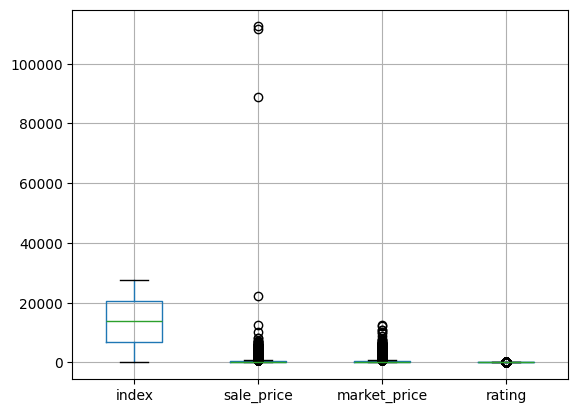

In [5]:
df.boxplot()


>**From the above chart and table the Insights are-**

- The sale_price (numerical variable) column is having the outliers which we have to handle to make it suitable for analysis.







In [6]:
df.head()

,index,product,category,sub_category,brand,sale_price,market_price,type,rating,description
0,1,Garlic Oil - Vegetarian Capsule 500 mg,Beauty & Hygiene,Hair Care,Sri Sri Ayurveda,220.0,220.0,Hair Oil & Serum,4.1,This Product contains Garlic Oil that is known...
1,2,Water Bottle - Orange,"Kitchen, Garden & Pets",Storage & Accessories,Mastercook,180.0,180.0,Water & Fridge Bottles,2.3,"Each product is microwave safe (without lid), ..."
2,3,"Brass Angle Deep - Plain, No.2",Cleaning & Household,Pooja Needs,Trm,119.0,250.0,Lamp & Lamp Oil,3.4,"A perfect gift for all occasions, be it your m..."
3,4,Cereal Flip Lid Container/Storage Jar - Assort...,Cleaning & Household,Bins & Bathroom Ware,Nakoda,149.0,176.0,"Laundry, Storage Baskets",3.7,Multipurpose container with an attractive desi...
4,5,Creme Soft Soap - For Hands & Body,Beauty & Hygiene,Bath & Hand Wash,Nivea,162.0,162.0,Bathing Bars & Soaps,4.4,Nivea Creme Soft Soap gives your skin the best...


<Figure size 1000x800 with 0 Axes>

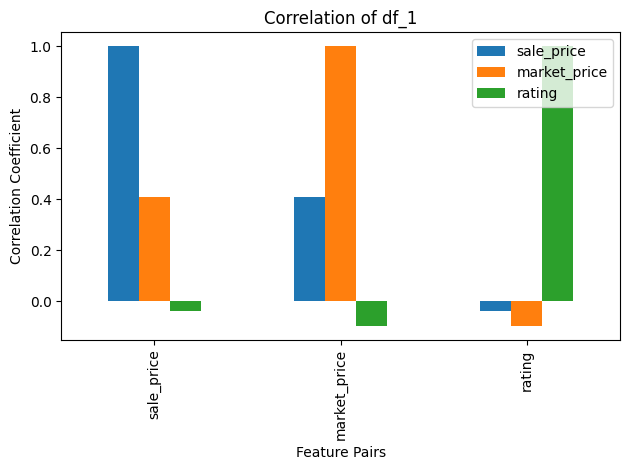

In [7]:
# Droping the index column and creating a new variable to store the numerical type dataset for correlation in between them.
df.drop("index", inplace= True, axis=1)
df_1 = df.select_dtypes(include= ['float64', 'int64'])
correlation_series = df_1.corr()

# Ploting the bar graph for the correlation between the numerical columns
plt.figure(figsize=(10, 8))
correlation_series.plot(kind='bar')
plt.title('Correlation of df_1')
plt.xlabel('Feature Pairs')
plt.ylabel('Correlation Coefficient')
plt.tight_layout()
plt.show()

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27555 entries, 0 to 27554
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   product       27554 non-null  object 
 1   category      27555 non-null  object 
 2   sub_category  27555 non-null  object 
 3   brand         27554 non-null  object 
 4   sale_price    27549 non-null  float64
 5   market_price  27555 non-null  float64
 6   type          27555 non-null  object 
 7   rating        18919 non-null  float64
 8   description   27440 non-null  object 
dtypes: float64(3), object(6)
memory usage: 1.9+ MB


In [9]:
# Sorting all unique column in ascending order.
sorted(df['category'].unique())

['Baby Care',
 'Bakery, Cakes & Dairy',
 'Beauty & Hygiene',
 'Beverages',
 'Cleaning & Household',
 'Eggs, Meat & Fish',
 'Foodgrains, Oil & Masala',
 'Fruits & Vegetables',
 'Gourmet & World Food',
 'Kitchen, Garden & Pets',
 'Snacks & Branded Foods']

# **Data cleaning**

In [10]:
# Doing a groupby (New table) between category and rating mean category wise for making the filling of null values easy
Category_ratings = df.groupby('category')['rating'].mean()
Category_ratings

,rating
category,
Baby Care,4.023790
"Bakery, Cakes & Dairy",3.911128
Beauty & Hygiene,3.930483
Beverages,4.084858
Cleaning & Household,3.956482
"Eggs, Meat & Fish",NaN
"Foodgrains, Oil & Masala",4.062181
Fruits & Vegetables,NaN
Gourmet & World Food,3.984272


>**As we in the above table that Eggs, Meat & Fish adn Fruits & Vegetables are having a null value.**

**So now we will handle them separately.**

In [11]:
# Creating the variable to store names of all column of the data
category_list = ['Baby Care','Bakery, Cakes & Dairy','Beauty & Hygiene','Beverages','Cleaning & Household','Eggs, Meat & Fish',
  'Foodgrains, Oil & Masala','Fruits & Vegetables','Gourmet & World Food','Kitchen, Garden & Pets','Snacks & Branded Foods']

# creating a loop to get the value of particular rating from the Groupby category_ratings table and filling the null values
x = 0
for i in category_list:
    df.loc[df['category'] == i, 'rating'] = df.loc[df['category'] == i, 'rating'].fillna(Category_ratings.iloc[x])
    x += 1

# As we saw in the Category_rating table that these columns were having null values so now we are filling them by their global average rating.
df.loc[df['category'] == 'Eggs, Meat & Fish', 'rating'] = df.loc[df['category'] == 'Eggs, Meat & Fish', 'rating'].fillna(4.0)
df.loc[df['category'] == 'Fruits & Vegetables', 'rating'] = df.loc[df['category'] == 'Fruits & Vegetables', 'rating'].fillna(4.4)

In [12]:
# Creating a new column to cheack if the rating columns having any null value
df['rating2'] = df['rating'].isnull()

In [13]:
# creating a groupby for counting the non null values of columns.
df.groupby('category')['rating2'].value_counts()

,,count
category,rating2,
Baby Care,False,610
"Bakery, Cakes & Dairy",False,851
Beauty & Hygiene,False,7867
Beverages,False,885
Cleaning & Household,False,2675
"Eggs, Meat & Fish",False,350
"Foodgrains, Oil & Masala",False,2676
Fruits & Vegetables,False,557
Gourmet & World Food,False,4690


>**As we seen in the starting that [sale_price, product, brand] these columns are having very few null value which we will drop(remove).**

In [14]:
df.dropna(subset=['sale_price', "product", "brand"], inplace=True)

In [15]:
# Filling null values in 'description' column with 'No Description available'
df['description'] = df['description'].fillna("No Description available")

In [16]:
# percentage of null values present in the columns
df.isnull().sum()/df.shape[0]*100

,0
product,0.0
category,0.0
sub_category,0.0
brand,0.0
sale_price,0.0
market_price,0.0
type,0.0
rating,0.0
description,0.0
rating2,0.0


In [17]:
df.describe()

,sale_price,market_price,rating
count,27547.000000,27547.000000,27547.000000
mean,334.663612,382.134875,3.951688
std,1202.144255,581.794643,0.617900
min,2.450000,3.000000,1.000000
25%,95.000000,100.000000,3.900000
50%,190.320000,220.000000,4.000000
75%,359.000000,425.000000,4.200000
max,112475.000000,12500.000000,5.000000


>**The Insights from the descriptive measure-**

1. Both sale_price and market_price are right-skewed, with sale_price showing extreme skewness due to very high maximum values (potential outliers).
  * We have to handle hte sale_price outliers.
2. Item ratings are generally high (around 4.0) and show much less variation




In [18]:
# Creating a function for filtering the Outliers from sale_price
def check_price_difference(df):
  df['price_difference_flag'] = df['sale_price'] > df['market_price']
  OP = df[df['price_difference_flag'] == True]
  if OP.shape[0]==0:
    print("There is no value ")
  else:
    return OP

check_price_difference(df)



,product,category,sub_category,brand,sale_price,market_price,type,rating,description,rating2,price_difference_flag
248,4mm Aluminium Induction Base Chapati Roti Tawa...,"Kitchen, Garden & Pets",Cookware & Non Stick,HAZEL,111649.0,1289.0,Tawa & Sauce Pan,3.734809,Hazel Aluminium Tawa has an ergonomic design f...,False,True
288,Arrabbiata Tomato Pasta Sauce With Chilli,Gourmet & World Food,"Sauces, Spreads & Dips",Montanini,22325.0,325.0,Mustard & Cheese Sauces,5.000000,No Description available,False,True
412,Original Care Lip Balm For 24h Moisture With S...,Beauty & Hygiene,Skin Care,Nivea,1114.8,140.0,Lip Care,4.300000,Nivea Original Care Lip Blam nourishes lips in...,False,True
436,"Balloon - Polka Dot, 12 Inch",Cleaning & Household,Party & Festive Needs,B Vishal,88899.0,129.0,"Caps, Balloons & Candles",3.900000,"Whether it is a party in the office, a Christm...",False,True
1249,Beard Kit,Beauty & Hygiene,Men's Grooming,Uncle Tony,112475.0,3300.0,Combos & Gift Sets,3.930483,"The combination of a beard oil, a beard wash, ...",False,True


In [19]:
# creating the funtion for replacing those outlier values
def replacing_Outliers(df):
   mask = df['sale_price'] > df['market_price']
   df.loc[mask, 'sale_price'] =  df.loc[mask, 'market_price']
replacing_Outliers(df)



In [20]:
# Checking if there is any outlier left
check_price_difference(df)

There is no value 


# **Data Exploration**

>**Now we will be showcasing some graphs to explore the cleaned data.**

### **Analysing the count of product in every category.**

In [21]:
categorized_products = df.groupby('category')['product'].count()
categorized_products

,product
category,
Baby Care,610
"Bakery, Cakes & Dairy",851
Beauty & Hygiene,7867
Beverages,884
Cleaning & Household,2672
"Eggs, Meat & Fish",350
"Foodgrains, Oil & Masala",2675
Fruits & Vegetables,557
Gourmet & World Food,4690


In [22]:
# creating the graph between number of products by category
fig = px.bar(categorized_products, title= 'No. of products in all categories',
       labels={'value': 'Number of Products', 'Index': 'Category'})
fig.update_layout(xaxis=dict(title='Category', tickangle=-45),
                  yaxis=dict(title='Number of Products'))
fig.show()

**The insights from the above chart between category and no. of products**
>* **'Beauty & Hygiene' is a dominant category:** The massive jump to 'Beauty & Hygiene' highlights it as a category with a very large product range, potentially the largest in this dataset.

>* **Significant variations in product range across categories:** The graph shows substantial ups and downs, indicating that the product variety is not evenly distributed across all categories. Some categories like 'Beauty & Hygiene' and 'Gourmet & World Food' have significantly more products than others like 'Beverages' or 'Eggs, Meat & Fish'.

### **Analysis the sales as per the category**

In [23]:
categorized_sales = df.groupby('category')['sale_price'].sum()
categorized_sales

,sale_price
category,
Baby Care,326317.17
"Bakery, Cakes & Dairy",121525.14
Beauty & Hygiene,3294599.44
Beverages,211986.67
Cleaning & Household,604941.09
"Eggs, Meat & Fish",101114.12
"Foodgrains, Oil & Masala",516870.23
Fruits & Vegetables,28345.36
Gourmet & World Food,1500115.31


In [28]:
fig_1 = px.scatter(
    categorized_sales.reset_index(),  # Reset index to make 'category' a column
    x='category',  # Specify x-axis using the now existing 'category' column
    y='sale_price',  # Specify y-axis
    text='sale_price',  # Add text labels
    title="Total Sale in All Categories",
    labels={'sale_price': 'Total Sale Prices', 'category': 'Category'}
)

# Customize text appearance
fig_1.update_traces(
    texttemplate='%{text:,.0f}',  # Format with comma separators
    textposition='top center'  # Position labels
)

fig_1.show()



>* **High Sales & High Product Count:** 'Beauty & Hygiene' had the highest no. of products in the previous graph and also has the highest total sales here. This suggests this category benefits from both a variety of products and strong sales performance (potentially higher average prices or high volume sales per product).

>* **High Sales despite Fewer Products (Relative):** 'Kitchen, Garden & Pets' generated the second-highest sales, even though 'Gourmet & World Food' had slightly more products in the previous chart. This might imply that products in 'Kitchen, Garden & Pets' have a higher average selling price or sell in higher quantities compared to 'Gourmet & World Food'.



### **Analysing the varieties of product by the category**

In [25]:
categorized_types = df.groupby('category')['type'].count()
categorized_types

,type
category,
Baby Care,610
"Bakery, Cakes & Dairy",851
Beauty & Hygiene,7867
Beverages,884
Cleaning & Household,2672
"Eggs, Meat & Fish",350
"Foodgrains, Oil & Masala",2675
Fruits & Vegetables,557
Gourmet & World Food,4690


In [61]:
fig_0 = px.bar(categorized_types, title= 'No. of types in all categories',
       labels={'value': 'count of types', 'Index': 'Category'})
fig_0.update_layout(xaxis=dict(title='Category'),
                  yaxis=dict(title='count of types'))
fig_0.show()



> **Dominant Category:** '**Beauty & Hygiene**' has the highest number of product entries by a large margin, with nearly 8,000 entries. This reinforces its position as the category with the most extensive product listing in this dataset.


> **Lowest Count Categories**: '**Eggs, Meat & Fish**' and 'Fruits & Vegetables' have the fewest product entries in the dataset (around 300-400 each).





### **Identifying the rating by the category of product.**

In [32]:
categorized_rating = df.groupby('category')['rating'].mean()
categorized_rating

,rating
category,
Baby Care,4.023790
"Bakery, Cakes & Dairy",3.911128
Beauty & Hygiene,3.930483
Beverages,4.084728
Cleaning & Household,3.956504
"Eggs, Meat & Fish",4.000000
"Foodgrains, Oil & Masala",4.062181
Fruits & Vegetables,4.400000
Gourmet & World Food,3.984272


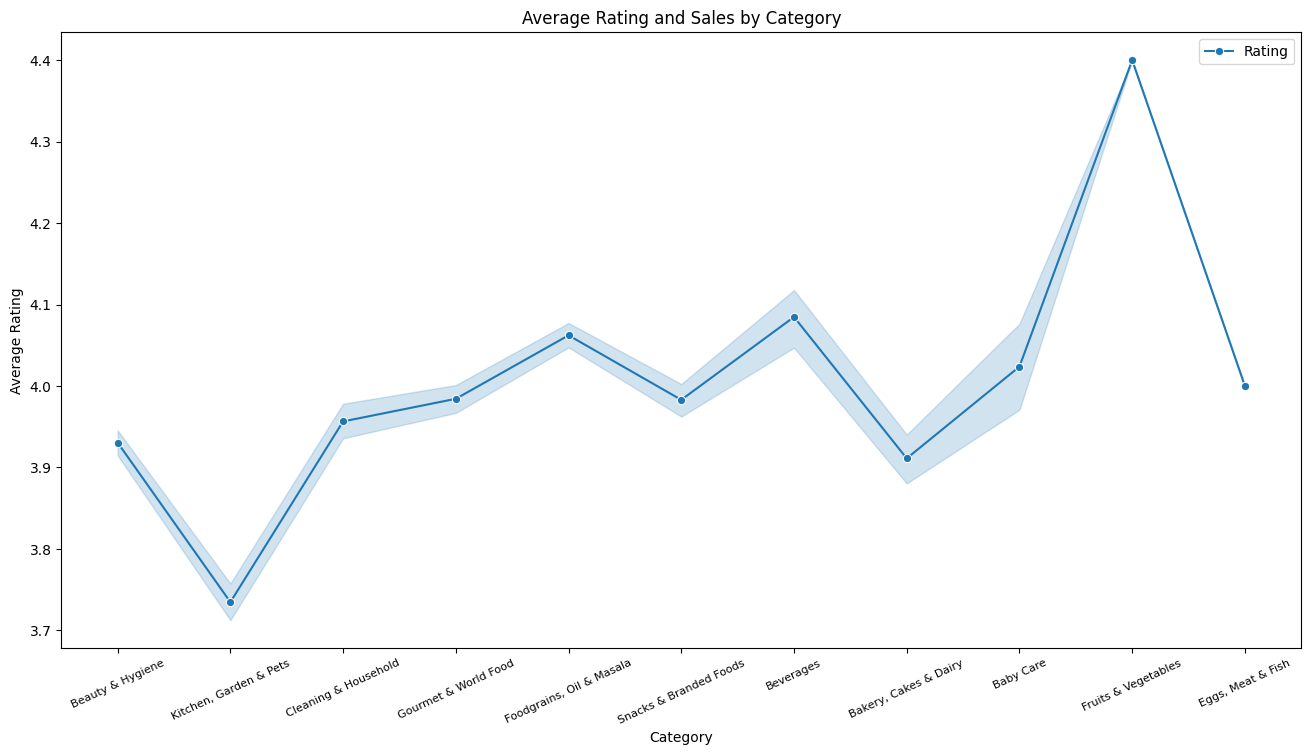

In [58]:
plt.figure(figsize=(16, 8))
fig_3 = sns.lineplot(x='category', y='rating', data=df, marker='o', label='Rating')
fig_3.set_xlabel('Category')
fig_3.set_ylabel('Average Rating')
plt.xticks(rotation=25)
plt.tick_params(axis='x', labelsize=8)
plt.title('Average Rating and Sales by Category')
plt.show()

# **conclusion**



> **Highest Rated Category:** 'Fruits & Vegetables' stands out dramatically with the highest average rating, approaching 4.4. Customers seem most satisfied with products in this category compared to all others.

> **Rating vs. Sales Disconnect (Based on previous charts):**

* The highest-rated category ('Fruits & Vegetables') had the lowest total sales. This suggests high quality/satisfaction but low purchase volume.

* The lowest-rated category ('Kitchen, Garden & Pets') had the second-highest total sales. High revenue in this category doesn't correlate with high customer satisfaction.

* The highest sales category ('Beauty & Hygiene') has only a moderate average rating (around 3.93).






* This analysis explored the BigBasket product dataset, beginning with essential
data cleaning steps. Missing values were addressed, notably in the rating column (imputed using category averages or assigned global averages where category data was missing) and description (filled with a placeholder). Rows with missing critical identifiers (product, brand) or sale_price were minimal and subsequently dropped. An important data quality check revealed instances where sale_price exceeded market_price; these outliers were handled by capping the sale_price at the market_price.


---



> **Exploratory Data Analysis (EDA) across product categories yielded several key insights:**

* Category Dominance: 'Beauty & Hygiene' stands out as the overwhelmingly dominant category in this dataset. It boasts the highest number of product listings and generates the highest total sales revenue by a significant margin.

* Significant Variation: There is substantial variation among categories in terms of product count, total sales, and average customer ratings. Product offerings and revenue are heavily concentrated in a few key categories.

* Sales vs. Product Count: While 'Beauty & Hygiene' leads in both, a high product count doesn't always translate directly to the highest sales across all categories. For instance, 'Kitchen, Garden & Pets' generated the second-highest sales despite having fewer listed products than 'Gourmet & World Food'. This suggests potential differences in average product price or sales velocity between these categories.

* Sales & Ratings Disconnect: Customer satisfaction (average rating) is not directly correlated with sales performance or product variety.

* The highest-rated category, 'Fruits & Vegetables' (average rating ~4.4), paradoxically generated the lowest total sales. This points towards high customer satisfaction but potentially low volume, low price points, or niche appeal within this dataset's scope.

* Conversely, 'Kitchen, Garden & Pets', a top-performing category in sales, received the lowest average rating (~3.73). This indicates popularity and revenue generation despite potentially lower customer satisfaction regarding product quality or expectations.

* The top-selling 'Beauty & Hygiene' category maintained a moderate average rating (around 3.93).

>**Implications:**

* 'Beauty & Hygiene' is a core strength and revenue driver.

* Strategies might be needed to improve perceived quality or manage expectations in the popular 'Kitchen, Garden & Pets' category to boost ratings.

* The 'Fruits & Vegetables' category, while well-liked, represents a smaller part of the business in terms of revenue in this dataset; understanding the reasons (pricing, volume, product range within the category) could reveal opportunities or confirm its niche status.

>**Overall**: The analysis highlights the diverse nature of BigBasket's product categories and reveals that popularity, revenue, and customer satisfaction do not always align, presenting potential areas for strategic focus.